In [79]:
%matplotlib notebook
import arvi
arvi.config.request_as_public = True

Let's look in more detail at what **arvi** can do.

We will use HD69830 as an example, since this target has several public datasets
in DACE.

In [80]:
from arvi import RV

In [81]:
s = RV('HD69830')

querying Simbad...
querying Gaia...


querying DACE for HD69830...
requesting DACE data as public
RVs available from
      HAMILTON ├ 2021ApJS..255....8R -  (43 observations)
               └ 2014ApJS..210....5F -  (32 observations)
         HARPS ├ 2006Natur.441..305L -  (74 observations)
       HARPS03 ├ 3.2.5 - HARPS (199 observations)
  HIRES-post04 ├ 2021ApJS..255....8R -  (529 observations)
         HIRES ├ 2017arXiv170203571B -  (439 observations)
           APF ├ 2021ApJS..255....8R -  (273 observations)
selecting latest pipeline (2021ApJS..255....8R) for HAMILTON
using Gaia information to remove secular acceleration
removing secular acceleration from RVs
subtracted weighted average from HAMILTON  : (-0.864 m/s)
subtracted weighted average from HARPS     : (30289.137 m/s)
subtracted weighted average from HARPS03   : (30138.473 m/s)
subtracted weighted average from HIRES_post04: (-1.141 m/s)
subtracted weighted average from HIRES     : (-0.184 m/s)
subtracted weighted average from APF       : (-1.165 m/s)
subtracted

The DACE query returned observations from several instruments. Since these
observations are public and may have been published in a refereed paper, some
are identified by the publication id (e.g. `2021ApJS..255....8R`).  
Inside **arvi**, these are called pipelines. Note that
**arvi** automatically selects the latest pipeline (in this case, the most
recent publication) for HAMILTON.

By default, the secular acceleration and a weighted average per instrument are
subtracted from the RVs. This puts all RVs around zero. Let's plot the data:

<IPython.core.display.Javascript object>

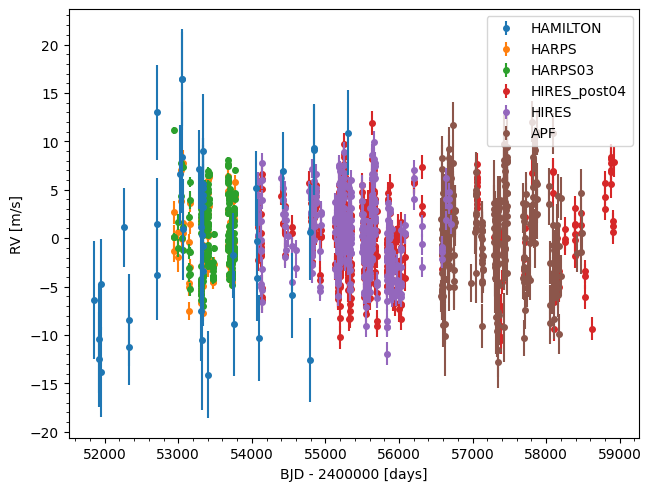

In [82]:
fig, axs = s.plot()
fig

Note that there is data for both HIRES and HIRES_post04 as well as HARPS and
HARPS03. This corresponds to the same instrument but different reductions (and
different publications). Some of the observations will be in common, but not
all. We can easily remove the HIRES and HARPS instruments, assuming that
HIRES_post04 and HARPS03 have the most up-to-date data.

In [83]:
s.remove_instrument('HIRES', strict=True)
s.remove_instrument('HARPS', strict=True)

Removed observations from 'HIRES'
Removed observations from 'HARPS'


<div class="admonition note">
    <div class="admonition-title">Note</div>
    <p style="margin-top: 1em">
        We used the <code>strict=True</code> option above to select only HIRES and HARPS. By default, the match with the instrument names is done recursively as 'HIRES*', so without <code>strict=True</code> we would have removed both HIRES and HIRES_post04 as well as HARPS and HARPS03.
    </p>
</div>

Let's see the update datasets

<IPython.core.display.Javascript object>

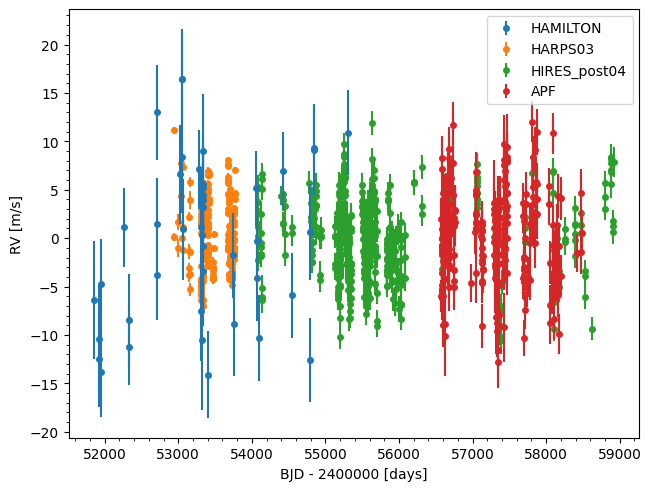

In [84]:
fig, axs = s.plot()
fig

### Attributes 

The `s` object holds several useful attributes related to the observations and to the
target. 

For example, you may notice above that **arvi** queried Simbad and Gaia for the
target name. The results are stored as attributes

In [85]:
s.simbad

HD69830 (V=5.95, sp_type='G8:V')

In [86]:
s.gaia

HD69830 (DR3 id=5726982995343100928)

which themselves have interesting attributes

In [87]:
s.simbad.B, s.simbad.V, s.simbad.bmv
s.simbad.sp_type
s.simbad.coords
s.simbad.plx
...;

In [88]:
s.gaia.radial_velocity, s.gaia.radial_velocity_error
...;

Each instrument is also stored as an attribute of `s` and is itself an
`RV` object:

In [89]:
s.HARPS03

RV(star='HD69830', N=199)

The data themselves are stored as numpy arrays

In [90]:
s.time
s.vrad
s.svrad
...;

<div class="admonition note">
    <div class="admonition-title">Note</div>
    <p style="margin-top: 1em">
        The names <code>vrad</code> and <code>svrad</code> have become somewhat standard in the community to refer to the radial velocities and their uncertainties.
    </p>
</div>

### Masking

A central concept in **arvi** is masking of observations. The `s` object
holds a boolean mask that indicates which observations are considered

In [91]:
s.mask

array([ True,  True,  True, ...,  True,  True,  True])

and several methods can modify this mask. For example

In [92]:
s.remove_point(1)

removing point 1 from HAMILTON


In [93]:
s.mask

array([ True, False,  True, ...,  True,  True,  True])

Other useful methods are

In [94]:
s.remove_before_bjd
s.remove_after_bjd
s.remove_before_bjd
s.remove_prog_id
s.remove_non_public
s.remove_condition
...;

The `s` object itself reflects the number of masked points

In [95]:
s

RV(star='HD69830', N=1044, masked=1, 4 instruments)

and the data without the masked points can be accessed with

In [96]:
s.mtime
s.mvrad
s.msvrad
...;

or

In [98]:
s.time[s.mask]
...;

<div class="admonition warning">
    <p class="admonition-title">Warning</p>
    <p>
        The <code>remove_instrument</code> method we used above does not modify <code>s.mask</code> but instead completely removes the data from that instrument.
    </p>
</div>

### Plots and analysis

We already saw the `s.plot()` function, but it's easy to plot other quantities than the RVs. For example

<IPython.core.display.Javascript object>

43 NaN values for HAMILTON
529 NaN values for HIRES_post04
273 NaN values for APF


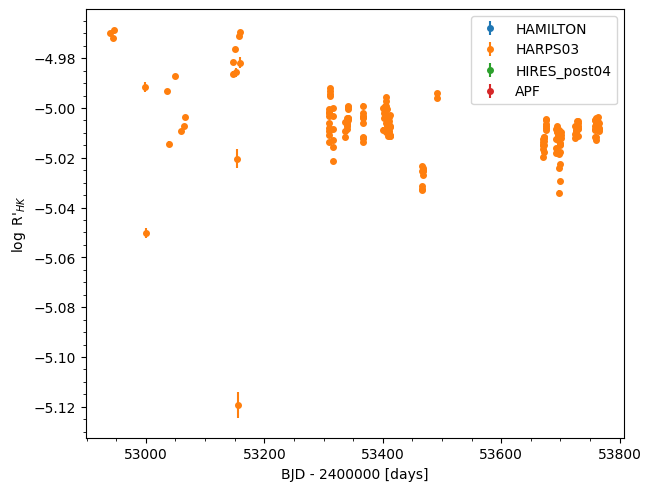

In [104]:
fig, axs = s.plot_rhk()
fig

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        Only the HARPS03 data has log R'HK values, which is why the function warns us about NaN values for the other instruments.
    </p>
</div>